# Python pour le Machine Learning : Projet Coronavirus + PRE-Traitement


## 1. Intro

Nous allons continuer notre analyse du dataset du coronavirus en faisant ensemble le prétraitement des données, ce qu'on appelle en anglais le "preprocessing". On dit souvent que cette étape est la plus longue et la plus difficile dans le travail d'un data scientist. 

Mais, je vais vous présenter une approche simple, rapide et efficace qui va vous permettre de faire du très bon preprocessing sur n'importe quel dataset, et ce, sans vous prendre la tête.

## 2. Step by step

Alors, pour rappel, le preprocessing, c'est l'étape qui consiste à préparer nos données avant de les fournir à la machine pour son apprentissage. 

Le but est à la fois de mettre nos données dans un format propice au développement de modèles de machine learning mais également d'avoir le dataset le plus propre possible afin d'améliorer la performance de notre modèle. 

Pour cela, il existe une tonne d'opérations possibles : on peut encoder nos données, les normaliser, nettoyer les valeurs manquantes, nettoyer les valeurs aberrantes, sélectionner les meilleures variables, créer de nouvelles variables, extraire certaines caractéristiques... Bref, il existe beaucoup d'opérations possibles et au milieu de tout ça, il est très facile de se perdre. C'est pourquoi, je vais vous présenter une approche qui est à la fois très simple à suivre et très efficace.

Cette démarche consiste à mettre de côté toutes les opérations un peu avancées comme la sélection de variables ou l'extraction de caractéristiques pour se concentrer uniquement sur le strict minimum : à savoir les opérations qui vont nous permettre de remplir l'objectif 1, mettre les données dans un format propice aux machines. 
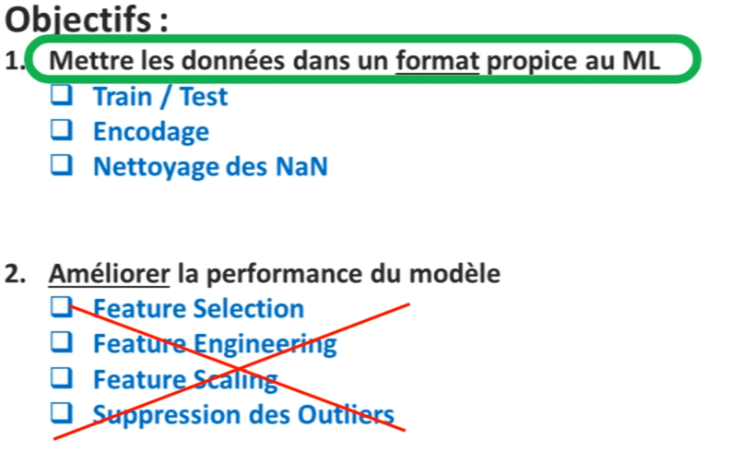


Ça veut dire quoi ? Ça veut dire qu'on va se contenter de faire trois choses : 
- créer un train set et un test set, 
- encoder nos variables et 
- nettoyer les valeurs manquantes. 

Voilà, c'est tout, basta. 

Ensuite, avant même de commencer à faire de la sélection de variables, de la normalisation ou de la génération de polynôme, on va créer un premier modèle de machine learning, aussi simple soit-il. 

On va créer un modèle de machine learning, on va l'évaluer, et on va en faire le diagnostic.
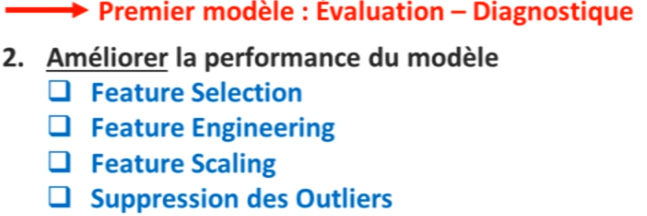

À partir de là, on va pouvoir tenter d'améliorer la performance de notre modèle avec les différentes opérations de preprocessing que j'ai mentionnées. Par exemple, si le modèle est en overfitting, alors on va essayer de faire de la sélection de variables pour améliorer la performance de ce modèle. 

Autrement dit, la démarche de travail que je vous conseille de suivre est extrêmement pragmatique. 
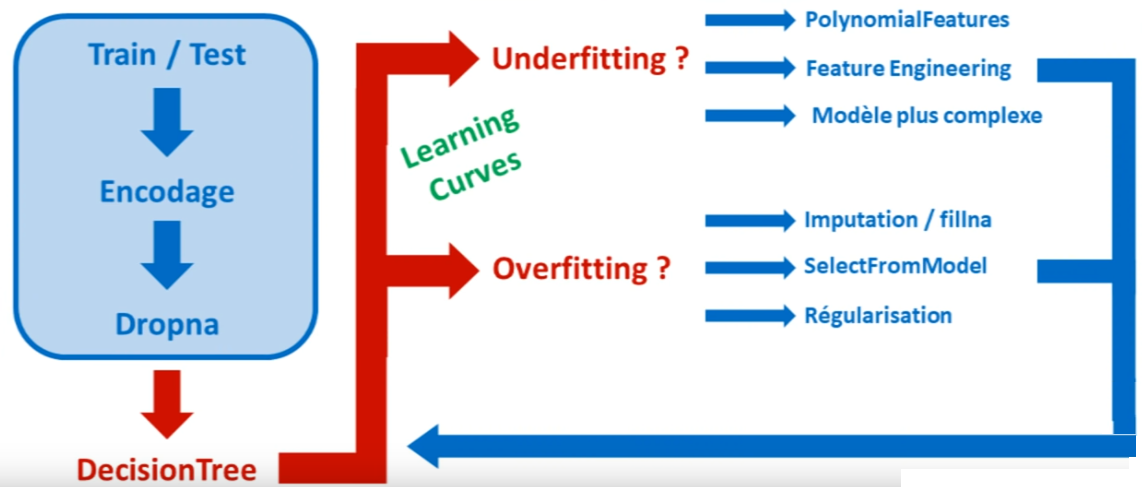


On commence par faire le strict minimum : 
- créer train / test, encodage et élimination des valeurs manquantes. 
- On développe un modèle extrêmement basique, par exemple un arbre de décision, et 
- à partir de là, on est dans une boucle itérative dans laquelle on part d'une idée, on l'implémente, et on l'évalue : idée, code, évaluation.
    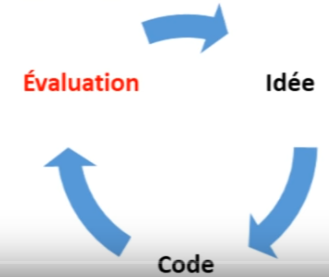

Et en faisant ça pas à pas, eh bien, on arrive à avoir un code assez robuste de preprocessing.

Bon, je pense que vous avez bien compris l'idée. 

## 3. Pre-Processing

Donc, maintenant, on passe à la pratique. Dans la première partie du projet, on avait effectué un certain nombre de modifications sur notre dataframe "df", mais rappelez-vous, ce dataframe n'était que la copie du dataframe originel, celui qui stockait réellement nos données, le dataframe "d'origine" avec lequel on avait chargé nos données. 

Donc, en général, quand on a fini de faire l'exploration de nos données sur cette copie avec laquelle on a pu jouer un peu et explorer, eh bien, ce qu'on fait, c'est qu'on refait une copie du dataframe d'origine, comme ça on peut repartir sur des bases saines et solides. 

Donc, c'est parti pour la suite de notre projet. On recrée une copie de notre dataframe d'origine. En général, on lui donne un autre nom, comme ça le dataframe qui a servi au preprocessing est toujours disponible et on peut continuer à observer certaines choses dessus. Mais bon, on va tout simplement garder le nom "df", ça simplifie un peu les choses. 

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
pd.set_option('display.max_Row',111)
pd.set_option('display.max_column',111)

data = pd.read_excel('./datasets/dataset.xlsx')

#url = 'https://raw.githubusercontent.com/MachineLearnia/Python-Machine-Learning/master/Dataset/dataset.csv'
#data = pd.read_csv(url, index_col=0, encoding = "ISO-8859-1")
data

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [3]:
df = data.copy()
df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Donc, à l'heure actuelle, ce dataframe est exactement comme celui qu'on avait pendant l'exploration des données, c'est-à-dire qu'il contient 111 colonnes, beaucoup de colonnes inutiles comme la colonne "version". 

Donc, ce qu'on va commencer par faire, c'est de sélectionner d'office les variables qu'on avait pu identifier comme réellement utiles. 

Concrètement, ça veut dire qu'on va recréer les sous-ensembles qu'on avait pu identifier, donc en utilisant, par exemple, une variable "missing_rates" qui nous donne les différents taux de valeurs manquantes pour chaque variable. 

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [5]:
mpl.rcParams['figure.max_open_warning'] = 30

In [6]:
missing_rate = df.isna().sum()/df.shape[0]
missing_rate

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu

Donc, pour filtrer les colonnes de type "sang" et les colonnes de type "viral",

In [7]:
blood_columns = list(df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)])
viral_columns = list(df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)])

et on va également créer une liste de colonnes importantes, qui sont l'âge et bien sûr notre target. 

In [8]:
key_columns =  ['Patient age quantile', 'SARS-Cov-2 exam result']

Grâce à ces trois sous-ensembles, eh bien, on va filtrer notre dataframe "df" en disant que "df" est égal à la liste qui contient "sang_colonnes" plus "blood_colonnes" plus "viral_colonnes", ce qui nous donne le résultat suivant. 

In [9]:
df = df[key_columns + blood_columns + viral_columns]
#df = df[key_columns + blood_columns] ## optimisation 3
df

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,17,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,4,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,10,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Autrement dit, on se retrouve avec les 33 colonnes qu'on avait identifiées la dernière fois comme utiles, et on repart sur des bases saines sur lesquelles on va maintenant pouvoir faire le preprocessing.

### 3.1 TainTest - Nettoyage - Encodage

Donc, pour commencer, on va importer depuis le module "model_selection" de scikit-learn la fonction "train_test_split". Cette fonction va nous être utile pour créer un train set et un test set. 

Donc, on écrit ces deux ensembles avec "train_test_split" dans lequel on fait passer "df". Ensuite, on va faire passer un "test_size" qui va peut-être être égal à 0.2, parce qu'on a quand même pas mal de données. Donc, je pense que 20% dans le test set, c'est pas mal, 20% de 5000, c'est pas mal. Et on va fixer notre aléatoire avec "random_state" égal à 0. 

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

Donc, vous êtes peut-être en train de découvrir la fonction "train_test_split" sous un nouvel angle, parce qu'en général on lui fait passer un "X" et un "y", et on écrit "X_train", "X_test", "y_train" et "y_test" (trainset, testset = train_test_split(X, y, test_size=0.2, random_state=0). 

Mais la fonction "train_test_split" peut aussi s'utiliser pour diviser tout simplement un dataframe "df" en "train_set" et "test_set", de façon complètement aléatoire, avec un "random_state" et une taille de test ("test_size") que l'on définit. 

Donc, à ce stade, on va voir à quoi ressemble notre "train_set" et notre "test_set". 

En fait, ce qui nous intéresse, c'est plutôt la variable clé. Donc, on va vérifier le nombre de valeurs que l'on a eu aléatoirement dans les deux parties. 

Donc, on fait "train_set[].value_counts"

In [12]:
trainset['SARS-Cov-2 exam result'].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

et on voit qu'on obtient, dans notre "train_set", 4000 cas négatifs et 400 cas positifs. 
Donc, ça correspond bien à 10%. 

Et si on fait la même chose pour notre "test_set", c'est très important de vérifier ça, juste pour être sûr d'avoir de bonnes proportions. 

In [13]:
testset['SARS-Cov-2 exam result'].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

Alors, on voit que dans notre test, on aura 1000 valeurs négatives et 100 valeurs positives. 

Bien, maintenant qu'on a créé un "train_set" et un "test_set", on peut passer au nettoyage. 

Bien sûr, le "test_set", on le met de côté et on n'y touche jamais. On n'a pas le droit de voir ce qu'il y a dedans, on n'a pas le droit de le manipuler à notre avantage. Non, il reste à part, et ce sont nos données futures. 

Donc, passons à l'encodage.

Durant l'analyse d'exploration des données, 

In [14]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

on a pu voir qu'en examinant les variables qualitatives, c'est-à-dire toutes les variables de type "object", qu'on avait en fait quatre grandes catégories : la catégorie 
- négative, 
- positive, 
- "detected", et 
- "non-detected". 

Pour effectuer un encodage, on va commencer par créer un dictionnaire qui va relier les catégories positive et négative à des nombres 0 et 1. Ainsi, on va créer un dictionnaire où "positive" est associé à 1, "négative" à 0, "detected" à 1, et "non-detected" sera associé à 0. 

In [15]:
code = {'negative':0,
            'positive':1,
            'not_detected':0,
            'detected':1}

Maintenant, avec ce dictionnaire, on va utiliser la fonction "map" de pandas pour appliquer cette fonction à toutes les colonnes de type "object". Donc, on écrit une boucle : "for column in df.select_dtypes('object')", on va alors mapper le dictionnaire à chaque élément de chaque colonne de type "object". 

In [16]:
 for col in df.select_dtypes('object'):
        df[col] = df[col].map(code)

Si on observe "df", toutes les variables qualitatives sont remplacées, c'est super. 

In [17]:
df

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Si on fait "df.dtypes.value_counts", on voit qu'il n'y a plus de variables de type "object" dans notre dataset. 

In [18]:
df.dtypes.value_counts()

float64    33
int64       2
dtype: int64

Encodage terminé.

Maintenant, pour faire les choses proprement, on va encapsuler cette logique dans une fonction "encodage", ce qui va nous permettre de traiter aussi bien notre "train_set" que notre "test_set" plus rapidement. 

In [19]:
def encodage(df):
    code = {'negative':0,
            'positive':1,
            'not_detected':0,
            'detected':1}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        #df.isetitem(col, map(code))
        
    return df

In [20]:
def feature_engineering(df): ## optimisation 3
    df['est malade'] = df[viral_columns].sum(axis=1) >= 1
    df = df.drop(viral_columns, axis=1)
    return df

De la même manière, on va créer une fonction "imputation" pour éliminer nos variables manquantes. Dans cette fonction, la solution la plus simple est d'utiliser "df.dropna(axis=0)". 

In [21]:
def imputation(df):
    #df['is na'] = (df['Parainfluenza 3'].isna()) | (df['Leukocytes'].isna()) ## Essai d'optimisation 2    
    #df = df.fillna(-999) ## Essai d'optimisation 1
    df = df.dropna(axis=0) ## premier model, non performant, mais qui au final sera choisit
    return  df

Pour finir, on va créer une fonction "preprocessing" dans laquelle on va dire que df est égal à encodage(df), on va donc effectuer l'encodage. 

Ensuite, on dira que df est égal à imputation(df), on va effectuer l'imputation. 

Et on terminera cette fonction en créant les variables X et Y dont on a besoin pour le preprocessing. On aura donc à la fois le X_train lorsque l'on passera le train_set et le X_test lorsqu'on passera le test_set dans cette fonction. 

Alors, qu'allons-nous faire ? On dira que X est égal à df.drop de la colonne "SARS-Cov-2 exam result", en précisant que c'est sur l'axe 1 qu'on veut éliminer cette colonne et obtenir le reste. 

Et on dira que Y est égal à df[SARS-Cov-2 exam result]. 

Pour conclure, on retournera X et Y.

In [22]:
def preprocessing(df):
    
    df = encodage(df)
    df = feature_engineering(df) ## optimisation 3
    df = imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result', axis=1)
    y = df['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    
    return X, y

À présent, on va faire passer notre train_set et notre test_set dans cette fonction. 

On écrira donc que X_train et Y_train sont égaux à preprocessing(train_set). 

In [23]:
X_train, y_train = preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


C:\Users\romeofr\AppData\Local\Temp\ipykernel_22740\64031687.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,col] = df[col].map(code)
C:\Users\romeofr\AppData\Local\Temp\ipykernel_22740\64031687.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,col] = df[col].map(code)
C:\Users\romeofr\AppData\Local\Temp\ipykernel_22740\64031687.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `

In [24]:
X_test, y_test = preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


C:\Users\romeofr\AppData\Local\Temp\ipykernel_22740\64031687.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,col] = df[col].map(code)
C:\Users\romeofr\AppData\Local\Temp\ipykernel_22740\64031687.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,col] = df[col].map(code)
C:\Users\romeofr\AppData\Local\Temp\ipykernel_22740\64031687.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `

Une bonne idée serait d'imprimer un rapport indiquant le nombre de cas positifs et négatifs que l'on retrouve dans Y après avoir effectué une imputation, car il sera nécessairement différent des valeurs initiales. 

Donc, on écrit Y.value_counts() et on observe que dans notre train_set, il y a 422 cas négatifs et 65 cas positifs pour entraîner notre modèle. Si on observe le test_set, il y a 50 cas négatifs et 12 cas positifs pour évaluer notre modèle.

### 3.2 Modelisation

À ce stade, nous avons effectué le preprocessing le plus simple et basique possible. Notre dataset est prêt et nous pouvons entraîner un modèle. 

Personnellement, j'aime bien utiliser un arbre de décision car c'est un modèle rapide et facile à comprendre. Cela sera très utile pour diagnostiquer le modèle et comprendre quelles sont les variables importantes, entre autres. 

Nous entrons maintenant dans la phase de modélisation. Je vais importer, depuis le module "tree" de scikit-learn, le DecisionTreeClassifier.

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

Avec cela, je vais créer un modèle d'arbre de décision où je fixerai le générateur aléatoire à 0. C'est essentiel pour garantir la reproductibilité de nos résultats et ainsi évaluer les différentes itérations de manière cohérente.

In [26]:
#model = DecisionTreeClassifier(random_state=0)
#model = RandomForestClassifier(random_state=0) ## optimisation 4
#model = make_pipeline(SelectKBest(f_classif, k=5),
#                      RandomForestClassifier(random_state=0)) ## optimisation 5
model = make_pipeline(PolynomialFeatures(2), SelectKBest(f_classif, k=10),
                      RandomForestClassifier(random_state=0)) ## optimisation 6

Puisque nous parlons d'évaluation, il est temps de mettre en place une procédure d'évaluation robuste, claire et informative.

### 3.3 Procédure d'évaluation

Nous utiliserons la métrique F1 car elle offre un bon équilibre entre la précision et le rappel. La précision et le rappel sont des métriques qui mesurent les proportions d'erreurs de type 1 et de type 2, c'est-à-dire les faux positifs et les faux négatifs que notre modèle pourrait produire. 

Pour cela, nous utiliserons sklearn.metrics.

Nous allons importer le score F1 et nous allons également importer des matrices de confusion pour examiner les rapports entre faux positifs et faux négatifs dont je vous ai parlé. 

En outre, nous allons importer un rapport de classification. C'est un excellent outil qui nous donnera un bilan de la précision et de l'exactitude, aussi connue sous le nom d'accuracy. Vous verrez, cet outil est vraiment très utile. 


In [27]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

Ensuite, nous allons importer depuis le module de sélection de modèle la fonction "learning curve" parce que cela nous sera utile pour déterminer si notre modèle fait de l'overfitting ou du underfitting. A partir de là, nous pourrons décider de faire une sélection de variables ou peut-être essayer de créer des polynômes, par exemple. Ces éléments nous seront vraiment utiles pour prendre ces types de décisions.

In [28]:
from sklearn.model_selection import learning_curve

Ainsi, nous allons créer une fonction "évaluation" dans laquelle nous voulons passer notre modèle. 

Dans cette fonction, nous commencerons par entraîner le modèle sur les données X_train et y_train. 

Ensuite, nous calculerons les prédictions de notre modèle sur le test set et nous afficherons notre matrice de confusion entre y_test et nos prédictions. 

Nous afficherons aussi notre rapport de classification entre y_test et nos prédictions.

In [29]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

Voyons si notre code fonctionne. 

C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[[91  4]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        95
           1       0.60      0.38      0.46        16

    accuracy                           0.87       111
   macro avg       0.75      0.67      0.70       111
weighted avg       0.86      0.87      0.86       111



C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWa

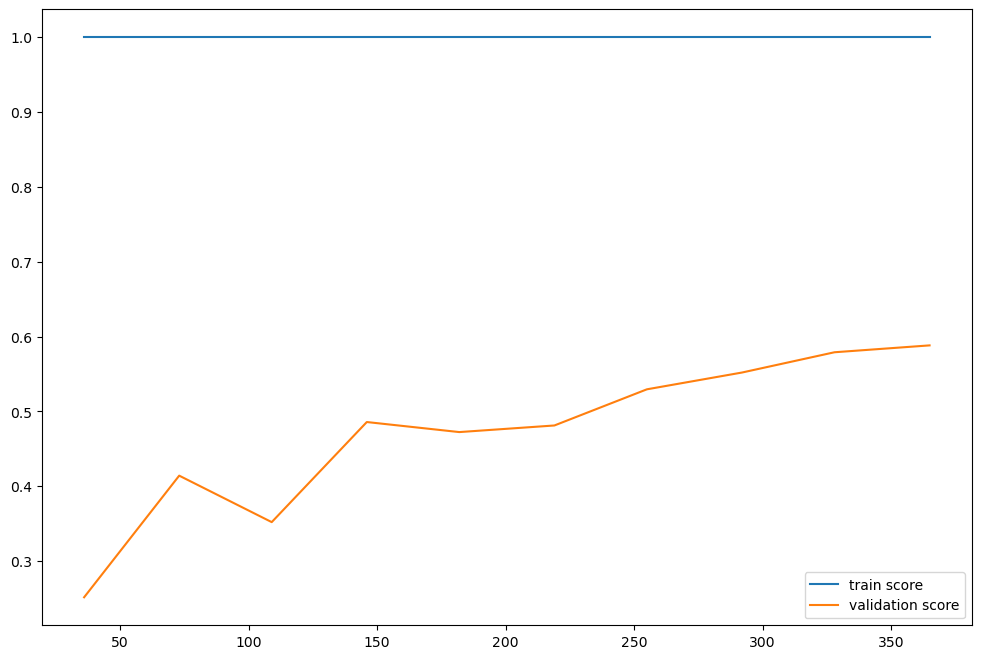

In [30]:
evaluation(model)

Si nous évaluons notre modèle et qu'il n'y a pas d'erreur, pour 95 cas négatifs dans notre test set, nous avons correctement identifié 87 personnes en leur disant "vous êtes négatif" et nous avons commis 8 erreurs. Donc, pour ces 8 personnes qui auraient dû être négatives, nous avons dit qu'elles devraient être hospitalisées car elles semblaient être positives. 

Cela nous donne une précision de 91% et une accuracy de 92% pour les cas négatifs. 

Ce qui nous intéresse davantage, ce sont les cas positifs. Y_test compte 16 cas positifs. Nous avons correctement identifié 7 cas positifs avec notre modèle et incorrectement rejeté 9 personnes. 

Parmi ces 16, nous n'avons identifié que 7 cas positifs, soit un rappel (recall) de 44%. Ce n'est pas idéal, mais c'est un premier modèle que nous avons créé en quelques minutes et nous n'avons effectué qu'un pré-traitement minimal.

Maintenant, nous ajouterons à cette fonction d'évaluation des courbes d'apprentissage pour déterminer si notre modèle est en underfitting ou en overfitting. Pour les utiliser, nous devons créer trois variables : une variable "N", une variable "train_score" et une variable "val_score" pour notre score de validation. 

Ces variables sont le résultat de notre fonction "learning curve" qui utilise la validation croisée pour entraîner et évaluer notre modèle sur plusieurs partitions de notre dataset. Nous précisons que le modèle doit être entraîné sur x_train et y_train avec, par exemple, une validation croisée égale à 4, en découpant le train set allant de 0,1 à 1.

Pour cela, nous pouvons utiliser la fonction "linspace" de NumPy. Enfin, nous ajouterons un score F1, car c'est un bon équilibre entre la précision et le rappel. 

Une fois que nous aurons calculé les différents scores avec cette courbe d'apprentissage, qui seront dans "train_score" et "val_score", nous devrons les visualiser dans un graphique avec matplotlib.


In [31]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(8, 4))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[[91  4]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        95
           1       0.60      0.38      0.46        16

    accuracy                           0.87       111
   macro avg       0.75      0.67      0.70       111
weighted avg       0.86      0.87      0.86       111



C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWa

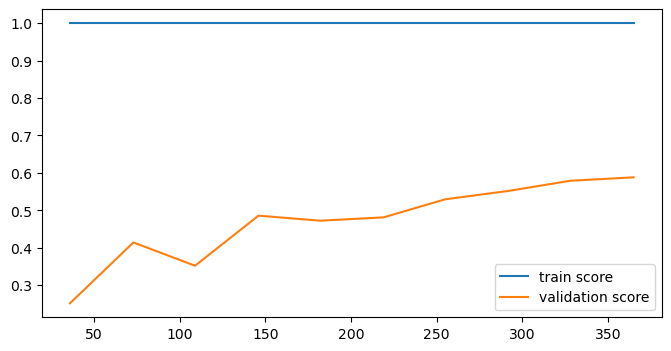

In [32]:
evaluation(model)

Après avoir exécuté ce code, nous obtiendrons les courbes d'apprentissage pour notre modèle actuel, et nous pourrons commencer à diagnostiquer notre modèle. Ce que nous observons, c'est que notre modèle est en overfitting car il a un score parfait sur le train set mais ne généralise pas bien sur le test set. À partir de là, nous pourrions essayer de modifier notre dataset pour lutter contre cet overfitting.

Une solution serait de fournir plus de données, car cela fonctionne généralement bien contre l'overfitting. 

Au lieu d'utiliser "dropna", qui nous donne très peu de données pour l'entraînement et le test, nous pourrions modifier cette fonction d'imputation. C'est là que commence le prétraitement intelligent. Au lieu d'utiliser "dropna", nous pourrions utiliser "fillna" pour remplir toutes les valeurs manquantes de notre dataset avec une valeur extrême, comme -999.

**Essai d'optimisation 1**
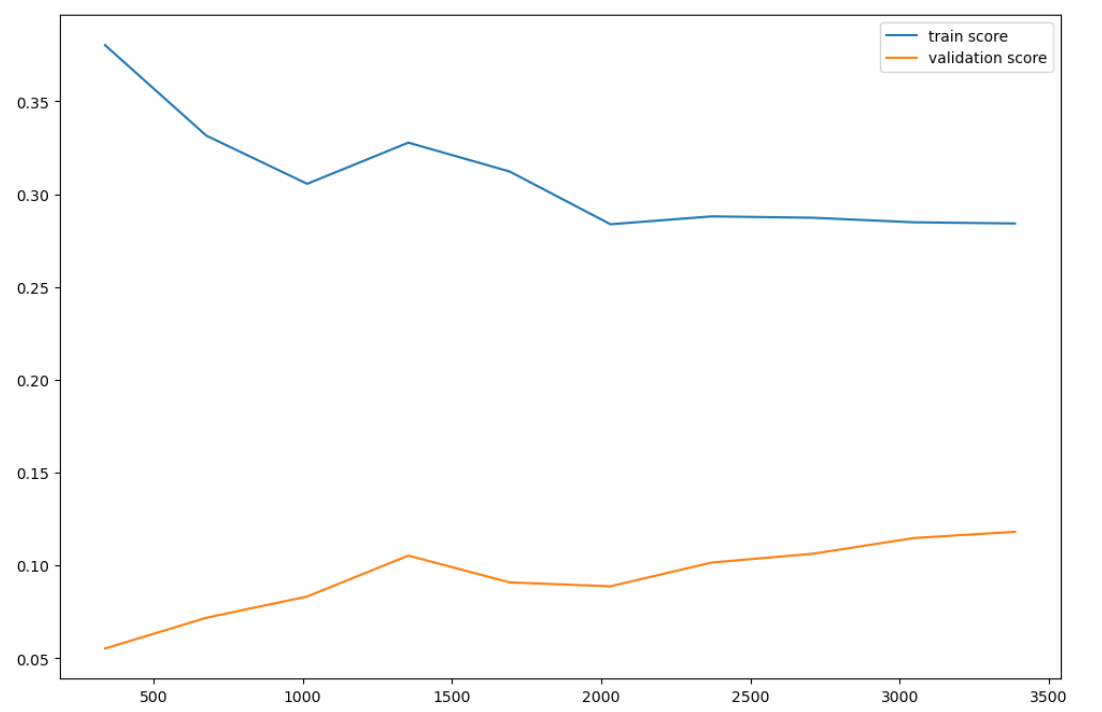

Donc, on voit tout de suite qu'aucune donnée n'a été éliminée, donc on a beaucoup plus de valeurs. Tout ce qu'on fait, c'est d'exécuter notre évaluation. Et là, on voit que le score est nettement moins bon. 

Pour commencer, tout à l'heure, nous avions un test score à 100% et maintenant il a diminué, il est maintenant à 30%. C'est très mauvais. 

Pour valider ce score, c'est encore pire. Donc, on n'a même pas besoin de regarder notre matrice de confusion, on sait d'office que ce n'est pas une bonne chose. Avoir plus de données pourrait nous aider, c'est indéniable, mais on ne peut pas faire ça en se contentant d'un "fillna -999". Ça, ça ne marche pas. 

**Essai d'optimisaion 2**


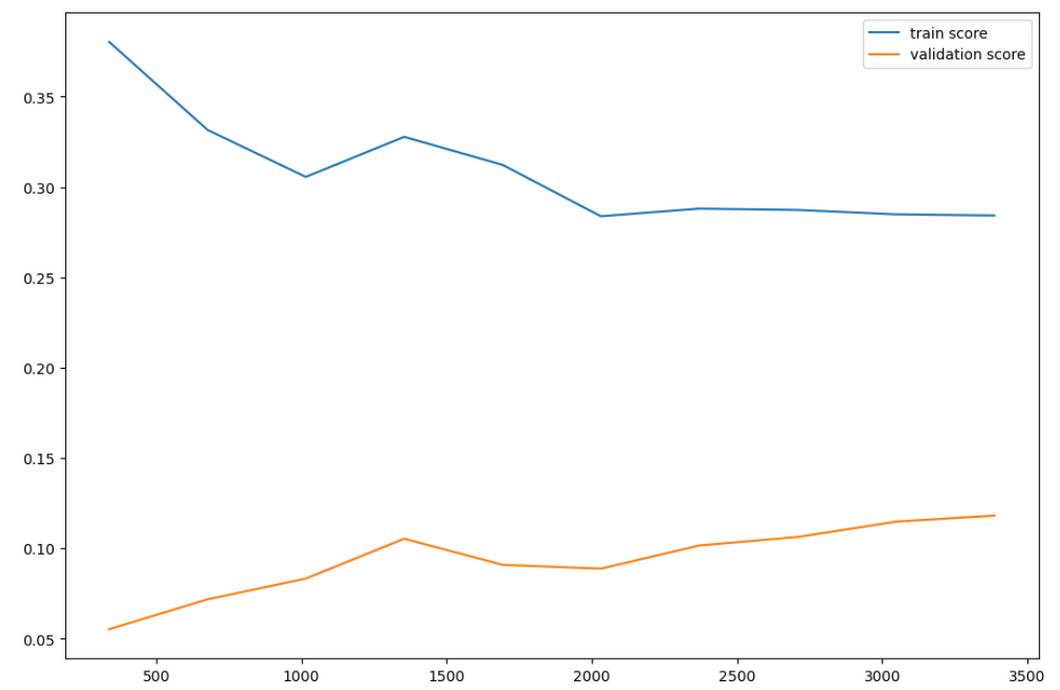

Alors, à ce stade, on pourrait tenter autre chose. On pourrait garder le "fillna", mais ajouter une variable qui nous indique la présence de valeurs manquantes. Vous vous souvenez du "missing indicator" de Scikit Learn qu'on avait vu? Eh bien, c'est exactement cela. 

Bien sûr, ce n'est pas garanti que ça fonctionne. Mais nous avons une formule ici qui nous permet d'évaluer nos idées à l'envie: générons des idées, mettons-les en place et évaluons-les. C'est aussi simple que ça. 

Donc, dans notre fonction d'imputation, en même temps que l'on impute nos données, ce qu'on pourrait faire, serait de créer par exemple une variable "is_missing" qui est égale à une de nos variables, au hasard, puisque cela semble être une variable dans laquelle des données manquent. 

Donc, on prend la variable "Parainfluenza 3" et c'est une variable manquante. Mais il n'y a pas que ce type de variables qui nous donnent des données manquantes, il y a également des variables de type "sang". Donc, on va prendre par exemple "leucocytes". 

On va utiliser le "or" classique sur les deux variables qu'on teste si les valeurs manquantes. On réévalue notre modèle, et non, cela a légèrement mieux fonctionné, mais ce n'est toujours pas ça. 

Donc clairement, le "fillna" ne donne pas de bons résultats. Même couplé à une gestion des valeurs manquantes, cela ne fonctionne pas. Donc on va laisser tomber cette idée. 

À présent, on va explorer une autre technique qui peut nous permettre de lutter contre l'overfitting, et cette idée, c'est la sélection de variables. 

Donc, pour commencer, on va enlever notre idée de "fillna". On va dire que "df" est égal à "df2.dropna()" sur l'axe 0. On va recréer notre set d'entraînement et on va ré-entraîner notre modèle. 

**Essai optimisation 3**

À partir de ce modèle, on va utiliser "feature_importance" qui nous dit quelles sont les variables les plus importantes dans la construction de l'arbre de décision. 

In [33]:
#model.feature_importances_ ##optimisation

Cela nous retourne un tableau, un peu difficile à lire. Donc ce que l'on va faire, c'est injecter ce tableau dans un dataframe de pandas dans lequel, pour chaque valeur, on aura la colonne associée. 

Donc, on écrit "pd.DataFrame", en paramètre : model.feature_importances_ et en index, on va prendre les colonnes de notre dataset. Donc, on fait un "x_train" qui en fait un dataframe de pandas également. On peut écrire "x_train.columns" et cela nous donne le tableau suivant. 

In [34]:
#pd.DataFrame(model.feature_importances_, index=X_train.columns) ##optimisation

Ce que l'on va faire maintenant, c'est visualiser ce tableau avec un graphique en barres. Donc, on fait "plot.bar()". 

In [35]:
#pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8)) optimisation

On se retrouve avec un graphique qui nous montre quelles sont les variables les plus importantes pour notre arbre de décision. 

Pour le rendre un peu plus grand, n'hésitez pas à mettre un "figsize" avec, par exemple, 12x8. C'est un peu plus lisible. 

Et là, on se rend compte de quelque chose de très intéressant : pour notre modèle, ce sont les variables de type "sang" les plus importantes, et ce ne sont pas vraiment les variables de virus. 

Mais finalement, ce n'est pas si surprenant, parce que lorsque nous avions analysé la variable cible dans l'exploration, nous avions vu que, par exemple, les plaquettes étaient clairement significatives d'une différence entre les cas positifs et les cas négatifs. Et de la même manière, pour, par exemple, les leucocytes. 

Et qu'observons-nous ici ? Eh bien, les leucocytes explosent complètement le plafond, les plaquettes également. Ensuite, on a les "red blood cells" et le reste, ce sont des variables intermédiaires. 

Mais toutes les données liées au virus, cela n'est pas tellement utiles. 

Donc, à partir de ce graphique, on peut faire deux choses. 

La première, c'est de définir un seuil en dessous duquel les variables ne sont pas sélectionnées. Par exemple, on pourrait choisir un seuil égal à 0.01 et toutes les variables qui sont en dessous de ce seuil, c'est-à-dire en dessous de cette ligne, toutes ces variables, elles partent à la poubelle. C'est une première possibilité. 

Une autre possibilité, c'est de réaliser que la majorité des variables qui n'ont aucune importance sont des données virales. 

Donc, pourquoi ne pas simplement supprimer ces données ? Cela pourrait être intéressant. Et cela pourrait être d'autant plus intéressant que lorsque l'on revisite le graphique des valeurs manquantes que nous avions tracé, nous avions remarqué que, entre les données de type "sang" et les données de type "virus", il y avait une différence en termes de valeurs manquantes. 
Et donc, en supprimant ces variables qui sont moins importantes et qui ont plus de valeurs manquantes, cela nous permettrait de récupérer de nombreux patients supplémentaires. 

Donc, la stratégie est très simple : on va se débarrasser de ces données inutiles. Et comment le faire ? Très simple, on va juste écrire "df = df.drop(columns = ['virus1', 'virus2', 'virus3', etc.])". Et voilà, on supprime ces colonnes et, en les supprimant, on va voir ce que cela donne. 

On recrée notre set d'entraînement, on ré-entraîne notre modèle et là, qu'est-ce qu'on observe ? On observe que le score n'a pas augmenté. En supprimant ces données virales, qui ne nous servaient à rien, on n'a pas pu améliorer notre modèle. 

**Essai d'optimisation 4**

L'idée suivante est d'utiliser un modèle régularisé ou un modèle qui lutte contre l'overfitting. Un très bon exemple est la Random Forest. Donc, au lieu d'utiliser un arbre de décision, on pourrait immédiatement utiliser depuis le module "ensemble" de scikit-learn, le classique "Random Forest". 

Nous allons donc remplacer cela par une Random Forest. À ce stade, nous ne réglons pas les paramètres de nos modèles. Cela, nous le ferons dans la prochaine vidéo. Actuellement, nous essayons d'ajuster notre dataset pour obtenir de bons résultats sur un modèle, disons, basique. Nous revenons donc en haut, réintroduisons les données initiales dans notre dataset, ré-entraînons notre modèle (qui est cette fois-ci un modèle de Random Forest) et jetons un autre coup d'œil à notre graphique.

L'autre idée était de définir un seuil de pertinence, mais maintenant que je regarde ce graphique, je me rappelle quelque chose que nous avions vu, lorsque nous avions créé une variable "est malade" qui prenait en compte si un patient avait été testé positif pour une autre maladie, nous avions observé certaines différences significatives dans les tests sanguins, comme les lymphocytes, qui n'étaient pas nécessairement détectées chez les personnes atteintes du coronavirus. Il est donc possible qu'en créant une variable "est malade" comme nous l'avions fait lors de l'exploration des données, nous obtenions de meilleures performances avec notre modèle de machine learning. 

L'exploration des données nous avait permis de tester différentes idées. Ainsi, dans notre chaîne de traitement, nous ajoutons une fonction que nous appellerons "feature engineering", car c'est ce qu'elle fait : elle crée de nouvelles variables à partir des variables existantes. Nous créons une variable "est malade" (ce qui ne signifie pas nécessairement que le patient est réellement malade, mais simplement qu'il a été testé positif pour une autre maladie). Après avoir créé cette variable, nous pourrions supprimer toutes les variables relatives aux virus, sauf celle indiquant si une personne a été infectée. Ces variables n'ont pas vraiment d'importance pour un arbre de décision ou une forêt aléatoire, mais elles sont combinées en une seule variable clé. Nous supprimons donc ces colonnes.

Cette fonction "feature engineering" doit être ajoutée avant l'imputation. Après avoir exécuté cette étape, nous répétons notre processus de traitement. Malheureusement, même avec ces changements, les performances ne s'améliorent pas beaucoup. 
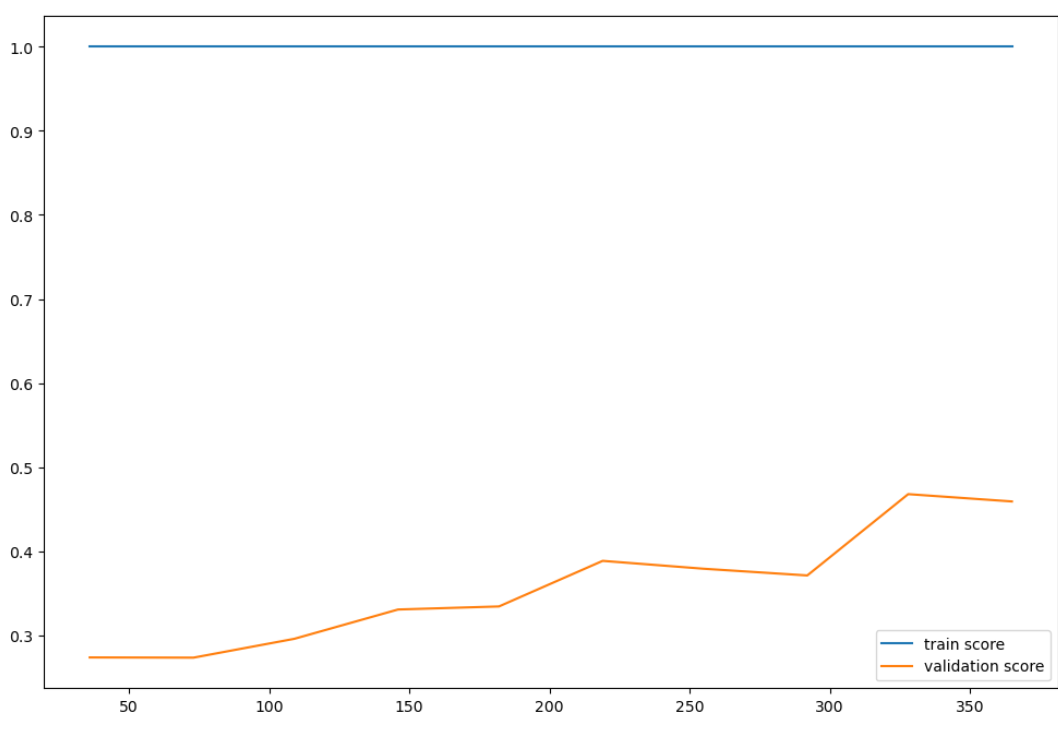

Cependant, il ne faut pas perdre espoir ; nous sommes sur la bonne voie. En examinant notre graphique, nous voyons qu'il y a toujours de nombreuses variables qui n'apportent pas une grande contribution à notre modèle. Nous pourrions essayer de définir un seuil en utilisant "SelectFromModel", comme nous l'avions vu dans une précédente vidéo, ou en utilisant "SelectKBest" qui effectue une sélection basée sur un test statistique. 

**Essai d'optimisation 5**

Pour cette dernière option, nous pourrions essayer un test ANOVA. Nous créons donc une "pipeline" qui nous permet de réaliser cette sélection tout en maintenant la cohérence entre nos ensembles d'entraînement et de test.

Nous importons les fonctions nécessaires et transformons notre modèle en modèle de pipeline. Nous débutons avec "SelectKBest" basé sur le test ANOVA. 

Par exemple, nous pourrions choisir les dix meilleures variables en fonction du test ANOVA. Après avoir défini notre pipeline, nous évaluons notre modèle. 

Les résultats montrent que nous faisons des progrès. La performance n'est pas encore idéale, mais elle s'améliore. Nous devrions peut-être ajuster le nombre de variables que nous sélectionnons. 

Nous essayons avec différentes valeurs et observons les résultats.
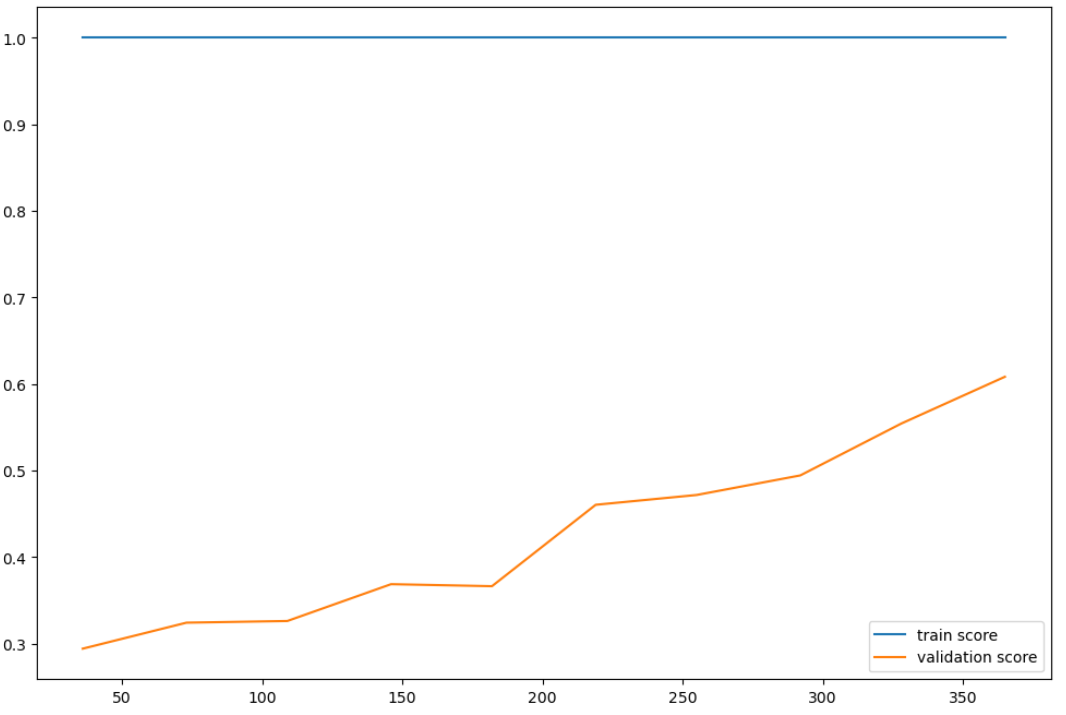

**Essai d'optimisation 6**

Une autre technique serait d'utiliser une expansion polynomiale pour créer plein de variables suivi d'un PCA ou d'un SelectKBest. 

Par exemple, on peut tenter de faire un Polynoimial Features avec un degré égal à 2, ce qui va avoir pour effet d'élever chaque variable au carré et de multiplier également chaque variable avec ses différents voisins. 

Ensuite, pour filtrer tout ça, on va garder simplement les dix meilleures variables, celles qui ont le score ANOVA le plus élevé. Et si on entraîne ce modèle, alors on voit qu'on est vraiment sur la bonne piste. 
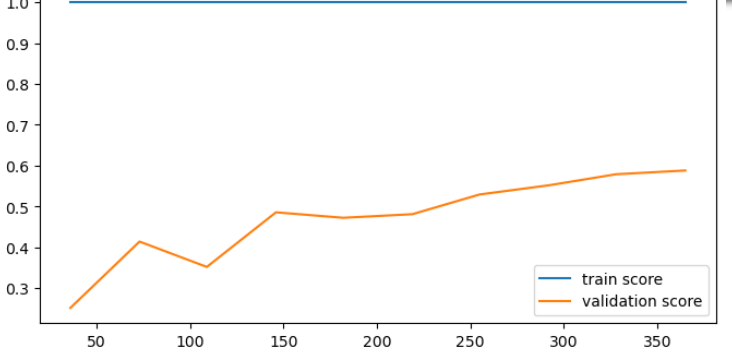

C'est-à-dire que, en intégrant tout ça dans une autre boucle de "Pre-processing" et en optimisant avec un "GridSearchV", alors on devrait obtenir de bons résultats. 

Ce que je voulais vous montrer, c'était une démarche de travail dans laquelle on peut tester nos différentes idées de "Pre-processsing". 

Vous pourriez vous dire, "Ouais, mais on n'a pas fait grand-chose. On n'a pas fait d'extraction de caractéristiques, on n'a pas fait de normalisation." 

Alors oui, par exemple, la normalisation on ne l'a pas faite, pourquoi ? Parce qu'à ce stade ce n'était pas nécessaire vu qu'on a développé des modèles basés sur des arbres et les arbres ne nécessitent pas de normalisation. 

Mais ce que vous aurez sans doute remarqué, c'est que le travail qu'on a fait a été guidé par des justifications. 

À aucun moment on a commencé à écrire un pavé de "Pré-processing". En fait, nos fonctions de "Pre-processing" ont été très petites, on a juste fait un peu d'encodage très basique, un peu de "feature engineering" très basique qui était basé sur ce qu'on avait pu découvrir dans lexploration de données. 

Une imputation assez basique, mais dans laquelle on a testé différentes idées et chaque idée a été, comme je viens de le dire, testée. 

On a justifié l'idée de base en se disant, "Tiens, on a un problème. Voici une possibilité pour le résoudre." 

On a testé cette possibilité et on l'a soit acceptée, soit rejetée à chaque fois. 

Et vous pouvez vous dire qu'on n'a pas fait grand-chose, mais on a fait énormément parce qu'on a rejeté énormément d'idées. Mais ça, c'est important, parce qu'il y a énormément de code, par exemple, que vous pouvez trouver sur Google, dans lesquels on écrit des pavés énormes de "Pre-processing" sans avoir la moindre idée du résultat que ça va nous donner. 

Mais ça, ce n'est pas intelligent. 

Ce qui est intelligent, c'est de fonctionner étape par étape, et c'est ce que je voulais vous montrer. 

## 3.2 Notebook : syntèse

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://raw.githubusercontent.com/MachineLearnia/Python-Machine-Learning/master/Dataset/dataset.csv'
data = pd.read_csv(url, index_col=0, encoding = "ISO-8859-1")
data.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient ID,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


PRE-PROCESSING

In [4]:
df = data.copy()
df.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient ID,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Création des sous-ensembles (suite au EDA)

In [5]:
missing_rate = df.isna().sum()/df.shape[0]

In [6]:
blood_columns = list(df.columns[(missing_rate < 0.9) & (missing_rate >0.88)])
viral_columns = list(df.columns[(missing_rate < 0.80) & (missing_rate > 0.75)])

In [7]:
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [8]:
df = df[key_columns + blood_columns + viral_columns]
df.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
Patient ID,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
a46b4402a0e5696,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f7d619a94f97c45,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d9e41465789c2b5,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


TrainTest - Nettoyage - Encodage

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [11]:
trainset['SARS-Cov-2 exam result'].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [12]:
testset['SARS-Cov-2 exam result'].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

In [13]:
def encodage(df):
    code = {'negative':0,
            'positive':1,
            'not_detected':0,
            'detected':1}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df

In [14]:
def feature_engineering(df):
    df['est malade'] = df[viral_columns].sum(axis=1) >= 1
    df = df.drop(viral_columns, axis=1)
    return df

In [15]:
def imputation(df):
    #df['is na'] = (df['Parainfluenza 3'].isna()) | (df['Leukocytes'].isna())
    #df = df.fillna(-999)
    df = df.dropna(axis=0)
    return  df

In [16]:
def preprocessing(df):
    
    df = encodage(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result', axis=1)
    y = df['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    
    return X, y

In [17]:
X_train, y_train = preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


C:\Users\romeofr\AppData\Local\Temp\ipykernel_21752\3304984417.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,col] = df[col].map(code)
C:\Users\romeofr\AppData\Local\Temp\ipykernel_21752\3304984417.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,col] = df[col].map(code)
C:\Users\romeofr\AppData\Local\Temp\ipykernel_21752\3304984417.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use ei

In [18]:
X_test, y_test = preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


C:\Users\romeofr\AppData\Local\Temp\ipykernel_21752\3304984417.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,col] = df[col].map(code)
C:\Users\romeofr\AppData\Local\Temp\ipykernel_21752\3304984417.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,col] = df[col].map(code)
C:\Users\romeofr\AppData\Local\Temp\ipykernel_21752\3304984417.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use ei

Modellisation

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [55]:
model_1 = RandomForestClassifier(random_state=0)

In [56]:
model_2 = make_pipeline(PolynomialFeatures(2), SelectKBest(f_classif, k=10),
                      RandomForestClassifier(random_state=0))

Procédure d'évaluation

In [57]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [58]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[92  3]
 [13  3]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        95
           1       0.50      0.19      0.27        16

    accuracy                           0.86       111
   macro avg       0.69      0.58      0.60       111
weighted avg       0.82      0.86      0.83       111



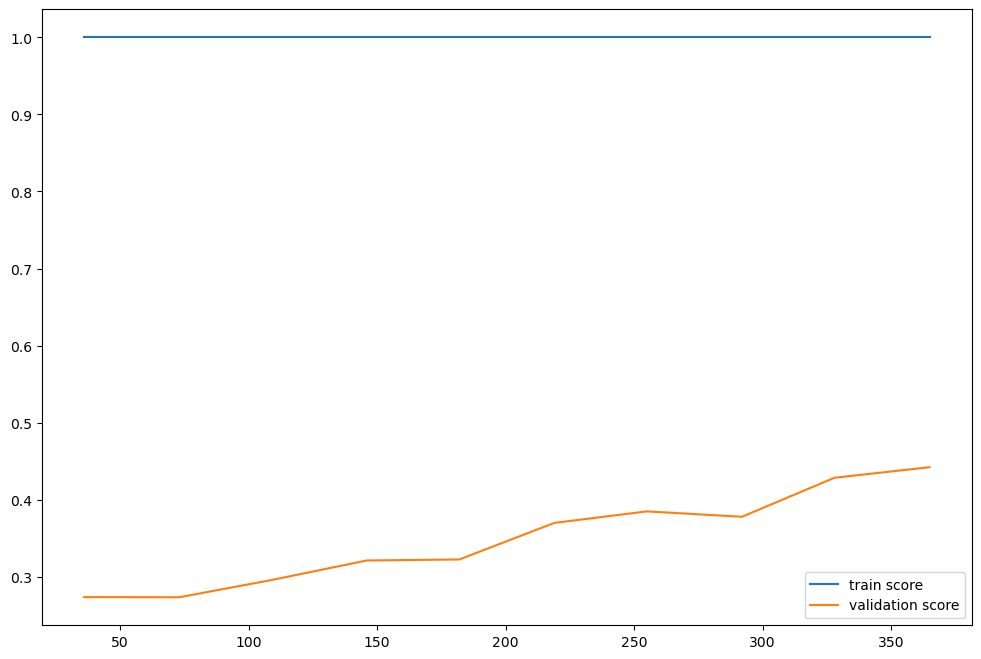

In [59]:
evaluation(model_1)

<Axes: >

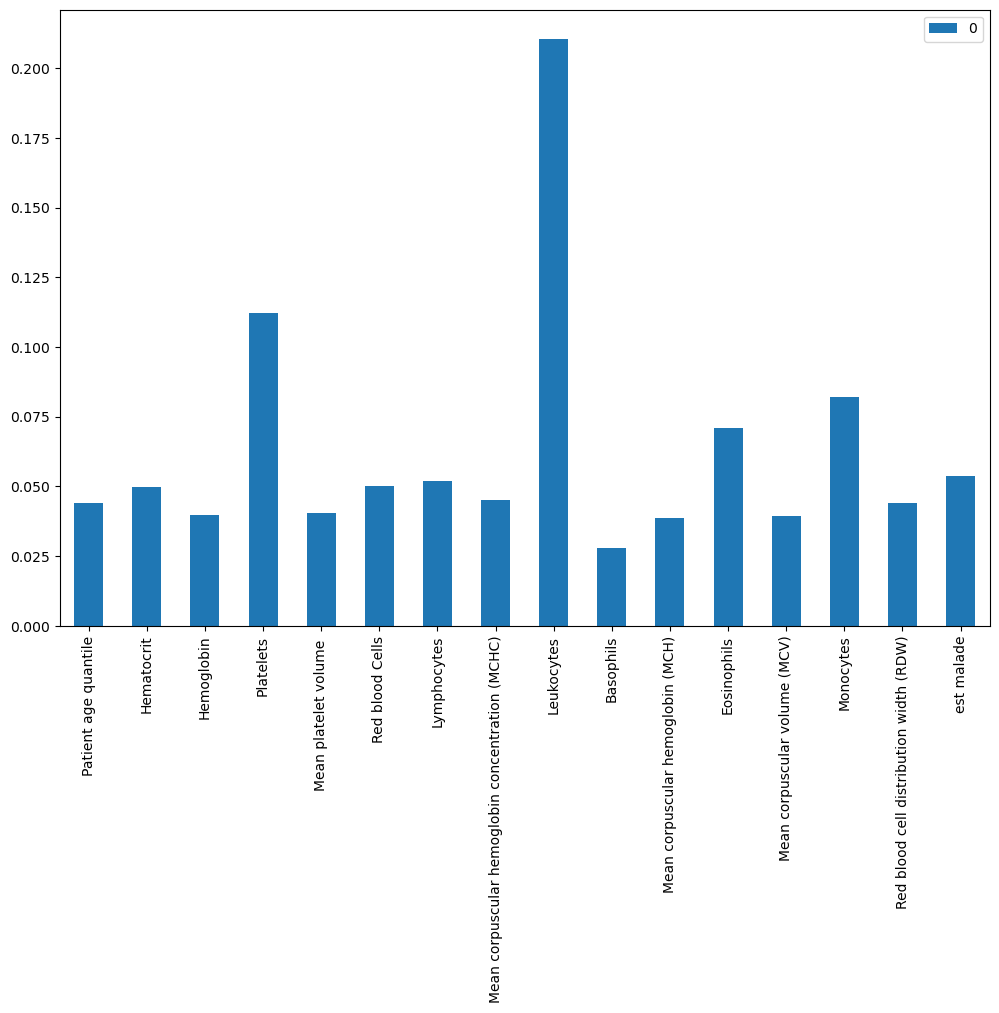

In [60]:
pd.DataFrame(model_1.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111



C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWa

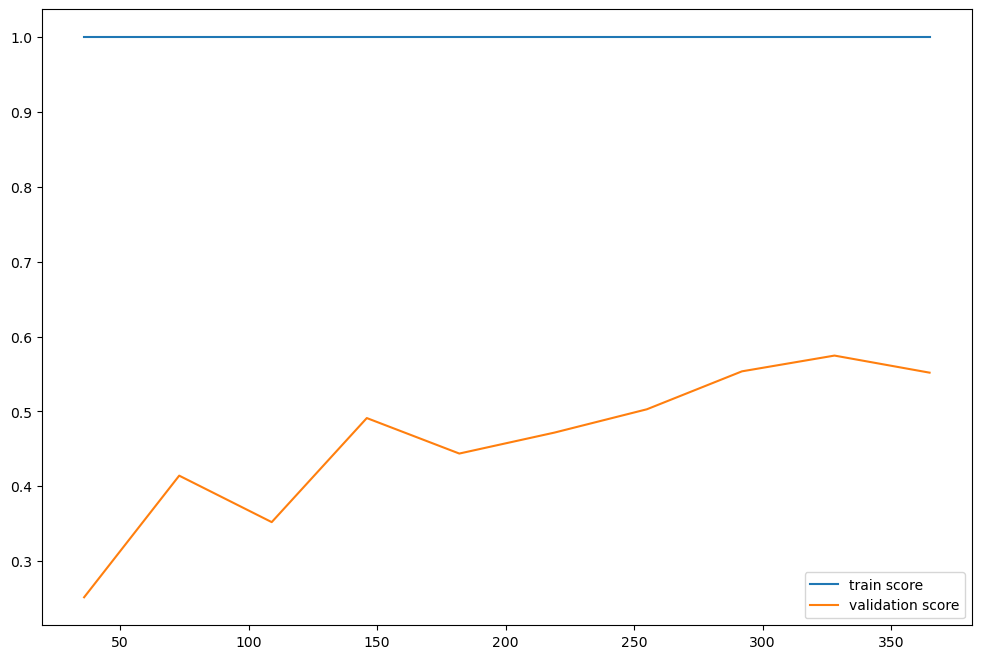

In [61]:
evaluation(model_2)